# **Prediction using Supervised ML**

# **GRIP - The Sparks Foundation**

## **Prediction of Scores based on Number of Study Hours**

Used Python Scikit Learn (Sklearn) Library to Build the Linear Regression Model. 

#### GOAL/TASKS

1] To find the relationship between Study Hours & Score?

2] If they are related then, how much is the impact of the Study Hours on the Score.

## **AUTHOR**

RACHIT AGARWAL [https://www.linkedin.com/in/racag/]

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
# Libraries used for Data Manipulation, Analysis & Cleaning

import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING THE DATA 

In [2]:
path = 'http://bit.ly/w-data'
data = pd.read_csv(path)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking the shape of the data

data.shape

(25, 2)

In [4]:
# Structure of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking for Null Values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Descriptive Statistics

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## EXPLORATORY DATA ANALYSIS {EDA}

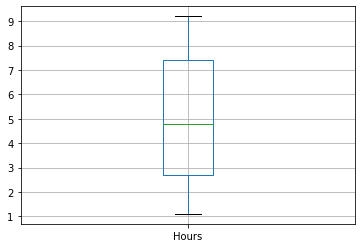

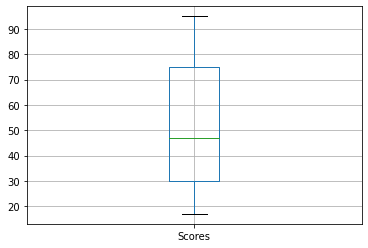

In [7]:
# Checking for Outliers

for i in data.columns:
    data.boxplot(column = i)
    plt.show()

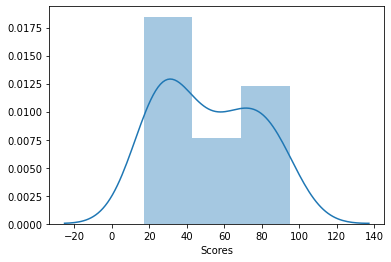

In [8]:
# Normal Distribution

sns.distplot(data['Scores'])

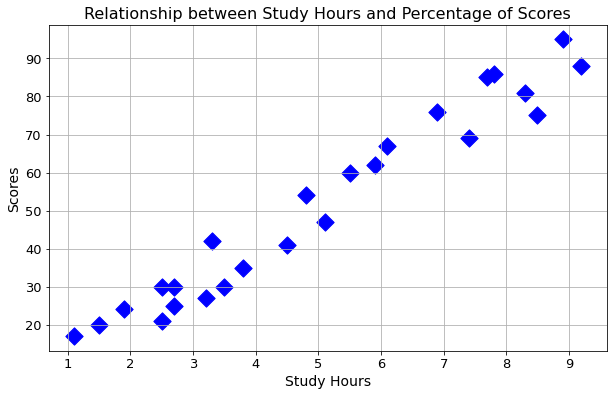

In [9]:
# Finding the relationship between Study Hours and Scores 

plt.figure(figsize = (10,6))
plt.scatter(x = 'Hours', y = 'Scores', data = data, marker = 'D', s = 150, c = 'b')

plt.title('Relationship between Study Hours and Percentage of Scores', fontsize = 16)
plt.xlabel('Study Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

#### From the graph we can clearly say that there is Strong Positive Linear relation between Study hours and Score

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


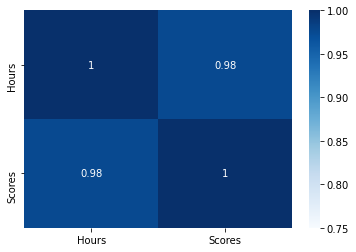

In [10]:
# Correlation Matrix

print(data.corr())
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', vmax = 1, vmin = 0.75);

### SPLITTING DATA INTO X & Y

In [11]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

### TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### SIMPLE LINEAR REGRESSION

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [14]:
# The Coefficent value for the Study Hours Variable
reg.coef_

array([9.91065648])

In [15]:
# The Intercept Value
reg.intercept_

2.018160041434683

In [16]:
result = pd.DataFrame(columns = ['Actual Scores', 'Predicted Scores'])
result['Actual Scores'] = Y_test
result['Predicted Scores'] = Y_pred
result.head()

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


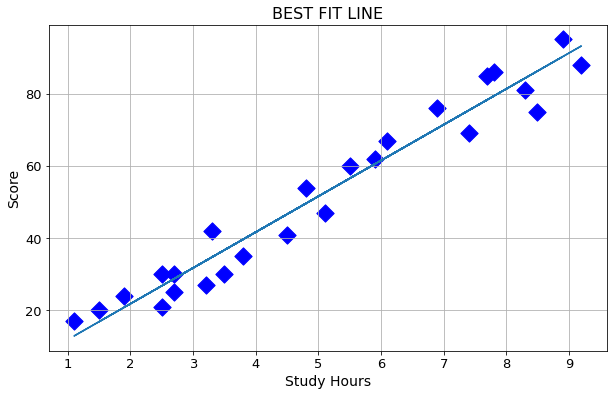

In [17]:
plt.figure(figsize = (10,6))

plt.scatter(x = 'Hours', y = 'Scores', data = data, marker = 'D', s = 150, c = 'b')

# Plotting the Line that the model has created
# Equation of line : y = mx + c
# m = reg_coef_
# c = reg_intercept_

plt.plot(X, reg.coef_ * X  + reg.intercept_)

plt.title('BEST FIT LINE', fontsize = 16)
plt.xlabel('Study Hours', fontsize = 14)
plt.ylabel('Score', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

### MODEL EVALUATION

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R-Square Value :',round(r2_score(Y_test, Y_pred),4),'\n')
print('Mean Absolute Error\nMAE :',round(mean_absolute_error(Y_test, Y_pred),4),'\n')
print('Mean Squared Error\nMSE :',round(mean_squared_error(Y_test, Y_pred),4),'\n')
print('Root Mean Squared Error\nRMSE :',round(np.sqrt(mean_squared_error(Y_test, Y_pred)),4),'\n')

R-Square Value : 0.9455 

Mean Absolute Error
MAE : 4.1839 

Mean Squared Error
MSE : 21.5988 

Root Mean Squared Error
RMSE : 4.6474 



### Predicting Score for a 9.25 of Study Hours  

In [19]:
b = float(input('Enter Number of Hours : '))
p1 = np.array(b).reshape(-1,1)
p = reg.predict(p1)
print('You Studied for',b,'Hours and your Score is',round(p[0],2))

Enter Number of Hours : 9.25
You Studied for 9.25 Hours and your Score is 93.69
